In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [8]:
url = "https://www.statista.com/statistics/263591/gross-domestic-product-gdp-of-the-united-states/"

html = requests.get(url).text
soup = BeautifulSoup(html)

# retrieiving data from cells of the table
cells = soup.find_all('td')
print(cells[:20])

[<td>2026*</td>, <td>27,659.15</td>, <td>2025*</td>, <td>26,719.63</td>, <td>2024*</td>, <td>25,790.12</td>, <td>2023*</td>, <td>24,892.61</td>, <td>2022*</td>, <td>24,003.7</td>, <td>2021*</td>, <td>22,675.27</td>, <td>2020</td>, <td>20,932.75</td>, <td>2019</td>, <td>21,433.23</td>, <td>2018</td>, <td>20,611.88</td>, <td>2017</td>, <td>19,542.98</td>]


In [9]:
gdp_data = []
for cell1, cell2 in zip(cells[::2], cells[1::2]):
    str1 = str(cell1)
    str2 = str(cell2)
    clean = re.compile('<.*?>')
    newstr1 = re.sub(clean, '', str1)
    newstr2 = re.sub(clean, '', str2)
    gdp_data.append({"Year": newstr1,
                    "GDP (in billion USD)": newstr2})
df_gdp = pd.DataFrame(gdp_data)

In [10]:
# exclude irrelavent data
# keep GDP data from 2000 to 2022
df_gdp = df_gdp[4:27]
df_gdp.reset_index(drop=True,inplace=True)

df_gdp['Year'] = df_gdp['Year'].apply(lambda x: x.replace('*',''))
df_gdp['GDP (in billion USD)'] = df_gdp['GDP (in billion USD)'].apply(lambda x: x.replace(',',''))
#df_gdp["Year"] = df_gdp["Year"].astype("int64")
#df_gdp["GDP (in billion USD)"] = df_gdp["GDP (in billion USD)"].astype(float)

df_gdp['Year'] = pd.to_numeric(df_gdp['Year'],errors='coerce')
df_gdp["GDP (in billion USD)"] = pd.to_numeric(df_gdp["GDP (in billion USD)"],errors='coerce')
print(df_gdp.dtypes)
df_gdp

Year                      int64
GDP (in billion USD)    float64
dtype: object


,Year,GDP (in billion USD)
0,2022,24003.70
1,2021,22675.27
2,2020,20932.75
3,2019,21433.23
4,2018,20611.88
5,2017,19542.98
6,2016,18745.10
7,2015,18238.30
8,2014,17527.28
9,2013,16784.83


(array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
        2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
        2000], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

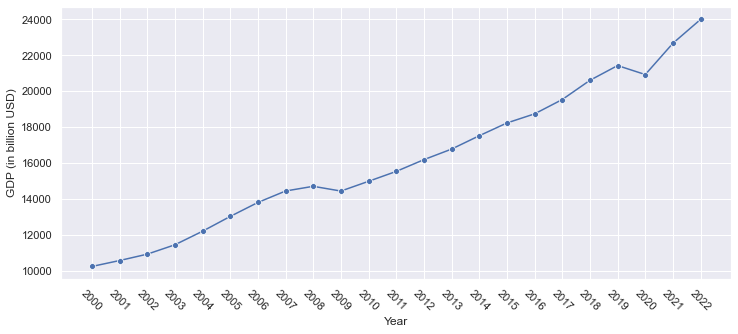

In [11]:
sns.set(rc = {'figure.figsize':(12,5)})
sns.lineplot(data = df_gdp,x = 'Year', y = 'GDP (in billion USD)',
            markers = True, marker = 'o').set(xticks = df_gdp['Year'])
plt.xticks(rotation = -45)